In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 버젼 2. tensorflow 라면 아래 코드 필요
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
tf.__version__

'2.2.0'

In [9]:
def graph(w_number, x_number, step_number):
    y = 1
    yprime = 0
    x = tf.Variable(tf.random_uniform([x_number], minval = -1, maxval = 1), name = 'x')
    
    for i in range(1, w_number + 1):
        globals()['w{}'.format(i)] = tf.Variable(tf.random_normal([1]), name = 'weight{}'.format(i))
        y += globals()['w{}'.format(i)]*(x**i)  # y = 1 + w1*(x) + w2*(x**2) + w3*(x**3) + w4*(x**4) + w5*(x**5) + w6*(x**6)
        yprime += i*globals()['w{}'.format(i)]*(x**(i-1))  # yprime = w1 + 2*w2*x + 3*w3*(x**2) + 4*w4*(x**3) + 5*w5*(x**4) + 6*w6*(x**5)
    
    cost = tf.reduce_mean(tf.square(yprime - y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
    train = optimizer.minimize(cost)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    cost_val = 1
    step = 0
    while cost_val > 0.5:  
        for i in range(1, w_number + 1):
            globals()['w{}_val'.format(i)] = sess.run([globals()['w{}'.format(i)]])
        cost_val, yprime_val, y_val, x_val, _ = sess.run([cost, yprime, y, x, train])
        if step % int(step_number / 5) == 0:
    #         print(step, "Cost: ", cost_val, "\nx: ", x_val,  "yprime: ", yprime_val, "y: ", y_val)
            print(step, "Cost: ", cost_val, "\n")
            print("w1: ", w1_val, "w2: ", w2_val, "w3: ", w3_val, "w4: ", w4_val, "w5: ", w5_val, "w6: ", w6_val, "\n")
        step += 1
        
#     for step in range(step_number + 1):
#         for i in range(1, w_number + 1):
#             globals()['w{}_val'.format(i)] = sess.run([globals()['w{}'.format(i)]])
#         cost_val, yprime_val, y_val, x_val, _ = sess.run([cost, yprime, y, x, train])
#         if step % int(step_number / 5) == 0:
#     #         print(step, "Cost: ", cost_val, "\nx: ", x_val,  "yprime: ", yprime_val, "y: ", y_val)
#             print(step, "Cost: ", cost_val, "\n")
#             print("w1: ", w1_val, "w2: ", w2_val, "w3: ", w3_val, "w4: ", w4_val, "w5: ", w5_val, "w6: ", w6_val, "\n")
#             if cost_val > 0.5:
#                 step = 0
            
# #         if cost_val == :
# #             break
            
            
    def y(x):
        answer = 1
        for i in range(1, w_number + 1):
            answer += globals()['w{}_val'.format(i)]*(x**i)
        return answer[0]
    
    globals()['w{}x{}'.format(w_number, x_number)] = [x_val, y(x_val)]
    plt.plot(x_val, y(x_val), '.')
    plt.show()

0 Cost:  33.71699 

w1:  [array([-0.58037186], dtype=float32)] w2:  [array([-0.22550867], dtype=float32)] w3:  [array([1.0945385], dtype=float32)] w4:  [array([-0.810589], dtype=float32)] w5:  [array([-0.09983978], dtype=float32)] w6:  [array([-2.1416488], dtype=float32)] 

6000 Cost:  3.2457647 

w1:  [array([-0.60702], dtype=float32)] w2:  [array([0.0201622], dtype=float32)] w3:  [array([1.0721607], dtype=float32)] w4:  [array([-0.50523466], dtype=float32)] w5:  [array([-0.08342585], dtype=float32)] w6:  [array([-1.8438683], dtype=float32)] 

12000 Cost:  1.9637333 

w1:  [array([-0.55359167], dtype=float32)] w2:  [array([0.12101801], dtype=float32)] w3:  [array([1.1013395], dtype=float32)] w4:  [array([-0.40064642], dtype=float32)] w5:  [array([-0.05183863], dtype=float32)] w6:  [array([-1.7653971], dtype=float32)] 

18000 Cost:  1.4682404 

w1:  [array([-0.4882824], dtype=float32)] w2:  [array([0.18755953], dtype=float32)] w3:  [array([1.1313328], dtype=float32)] w4:  [array([-0.33

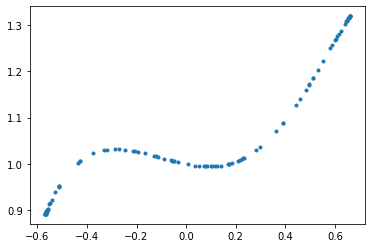

In [10]:
graph(6, 100, 30000)

0 Cost:  766.903 

w1:  [array([-0.7773928], dtype=float32)] w2:  [array([-0.99589485], dtype=float32)] w3:  [array([-1.4645568], dtype=float32)] w4:  [array([-1.6128476], dtype=float32)] w5:  [array([-0.3411711], dtype=float32)] w6:  [array([0.5407684], dtype=float32)] 

6000 Cost:  5.1525645 

w1:  [array([-0.6095145], dtype=float32)] w2:  [array([-0.9223852], dtype=float32)] w3:  [array([-1.2736773], dtype=float32)] w4:  [array([-1.5130422], dtype=float32)] w5:  [array([-0.16530144], dtype=float32)] w6:  [array([0.62570703], dtype=float32)] 

12000 Cost:  3.8283365 

w1:  [array([-0.48669845], dtype=float32)] w2:  [array([-0.8399595], dtype=float32)] w3:  [array([-1.1698376], dtype=float32)] w4:  [array([-1.4160943], dtype=float32)] w5:  [array([-0.09008553], dtype=float32)] w6:  [array([0.70590305], dtype=float32)] 

18000 Cost:  3.0966065 

w1:  [array([-0.37776995], dtype=float32)] w2:  [array([-0.7706566], dtype=float32)] w3:  [array([-1.0911123], dtype=float32)] w4:  [array([-1

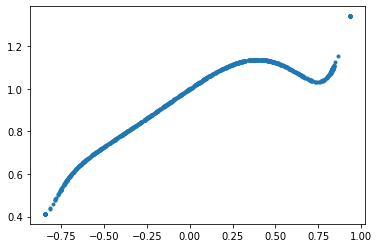

In [16]:
graph(60, 1000, 30000)

0 Cost:  5.955911 

w1:  [array([-0.8499209], dtype=float32)] w2:  [array([-0.5191504], dtype=float32)] w3:  [array([-0.16329242], dtype=float32)] w4:  [array([-0.0966441], dtype=float32)] w5:  [array([0.70631886], dtype=float32)] w6:  [array([1.2921201], dtype=float32)] 

6000 Cost:  2.4450593 

w1:  [array([-0.65904325], dtype=float32)] w2:  [array([-0.66394854], dtype=float32)] w3:  [array([-0.07249316], dtype=float32)] w4:  [array([-0.31712848], dtype=float32)] w5:  [array([0.74394363], dtype=float32)] w6:  [array([1.0155576], dtype=float32)] 

12000 Cost:  1.8042209 

w1:  [array([-0.5455108], dtype=float32)] w2:  [array([-0.7022431], dtype=float32)] w3:  [array([-0.05925432], dtype=float32)] w4:  [array([-0.39717498], dtype=float32)] w5:  [array([0.7041934], dtype=float32)] w6:  [array([0.8997787], dtype=float32)] 

18000 Cost:  1.55348 

w1:  [array([-0.45903647], dtype=float32)] w2:  [array([-0.7029473], dtype=float32)] w3:  [array([-0.06492422], dtype=float32)] w4:  [array([-0

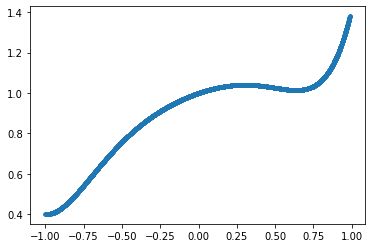

In [13]:
graph(6, 10000, 30000)

0 Cost:  22.188347 

w1:  [array([1.3761337], dtype=float32)] w2:  [array([0.11139093], dtype=float32)] w3:  [array([0.6900639], dtype=float32)] w4:  [array([2.2501588], dtype=float32)] w5:  [array([0.9047758], dtype=float32)] w6:  [array([1.2022839], dtype=float32)] 

6000 Cost:  7.924106 

w1:  [array([1.398403], dtype=float32)] w2:  [array([-0.17092101], dtype=float32)] w3:  [array([0.5691523], dtype=float32)] w4:  [array([1.7379683], dtype=float32)] w5:  [array([0.7099659], dtype=float32)] w6:  [array([0.5537996], dtype=float32)] 

12000 Cost:  3.449974 

w1:  [array([1.350883], dtype=float32)] w2:  [array([-0.28423342], dtype=float32)] w3:  [array([0.41919094], dtype=float32)] w4:  [array([1.4810776], dtype=float32)] w5:  [array([0.5069941], dtype=float32)] w6:  [array([0.21195742], dtype=float32)] 

18000 Cost:  1.6318394 

w1:  [array([1.2935464], dtype=float32)] w2:  [array([-0.33091438], dtype=float32)] w3:  [array([0.295178], dtype=float32)] w4:  [array([1.3371023], dtype=flo

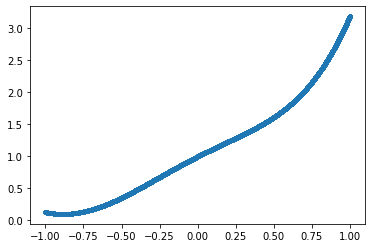

In [14]:
graph(6, 100000, 30000)

NameError: name 'w6x1000' is not defined

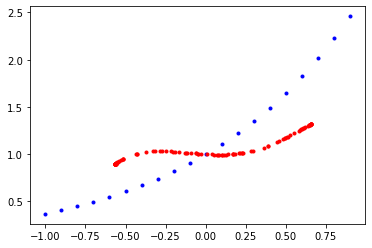

In [15]:
x = np.array([i for i in range(-10, 10, 1)])
plt.plot(0.1*x, np.exp(0.1*x), '.b', label = 'exp')
plt.plot(w6x100[0],w6x100[1], '.r', label = 'w=6, x=100')
plt.plot(w6x1000[0],w6x1000[1], '.g', label = 'w=6, x=1000')
plt.plot(w6x10000[0],w6x10000[1], '.c', label = 'w=6, x=10000')
plt.plot(w6x100000[0],w6x100000[1], '.m', label = 'w=6, x=100000')
plt.legend(loc = 'upper right', fontsize = 'xx-small')

plt.show()